In [7]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

# Load the dataset

df = pd.read_csv('Customer_Behaviour.csv')

# Display the first few rows
df.head()


,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [8]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [9]:
# Data Preprocessing
# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])  # Encode Gender: Male=1, Female=0

In [10]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0
...,...,...,...,...,...
395,15691863,0,46,41000,1
396,15706071,1,51,23000,1
397,15654296,0,50,20000,1
398,15755018,1,36,33000,0


In [12]:
# Standardize features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df[['Gender', 'Age', 'EstimatedSalary', 'Purchased']])

C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ngoak\.

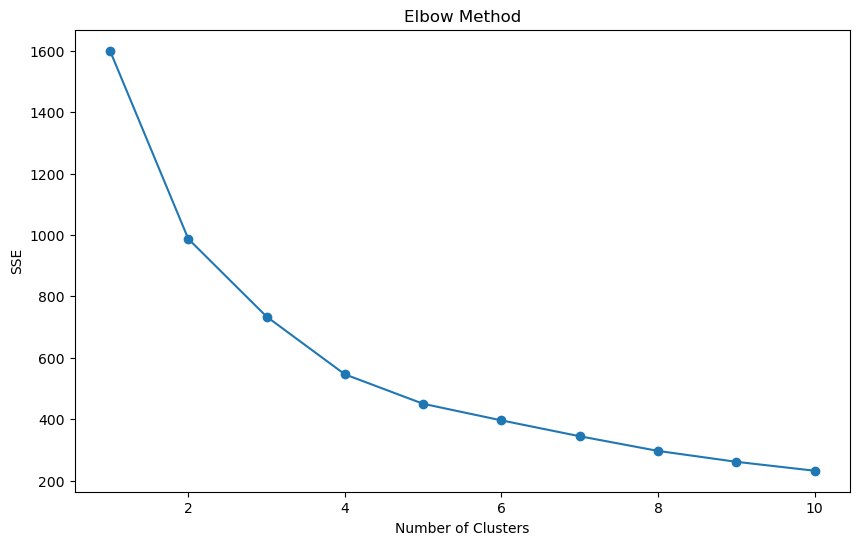

In [13]:
# Determine Optimal Number of Clusters
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    sse.append(kmeans.inertia_)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\ngoak\.

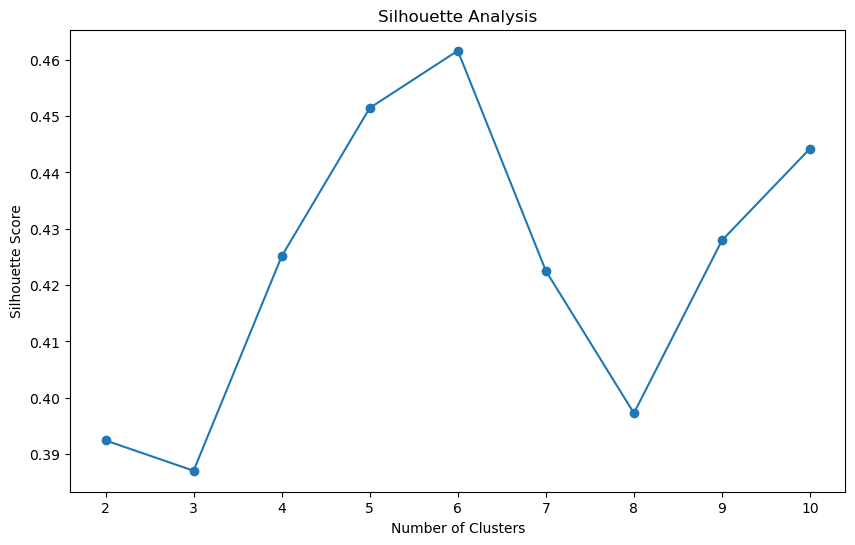

In [14]:
# Silhouette Analysis
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

In [15]:

# Apply K-means Clustering
optimal_clusters = 4  # Example optimal number of clusters (update based on analysis)
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(data_scaled)

C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [16]:
# Analyze Clusters
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_profiles = pd.DataFrame(cluster_centers, columns=['Gender', 'Age', 'EstimatedSalary', 'Purchased'])
print(cluster_profiles)

         Gender        Age  EstimatedSalary     Purchased
0  1.000000e+00  32.364341     59000.000000  1.665335e-16
1  5.000000e-01  50.883333     42600.000000  9.833333e-01
2  4.204545e-01  43.568182    117556.818182  9.545455e-01
3  4.440892e-16  32.520325     60040.650407  2.220446e-16


*This table provides structured data about individuals, their demographics (gender, age), economic status (estimated salary), and a binary outcome related to their purchase behavior.*









C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\ngoak\.jupyter\New folder\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Co

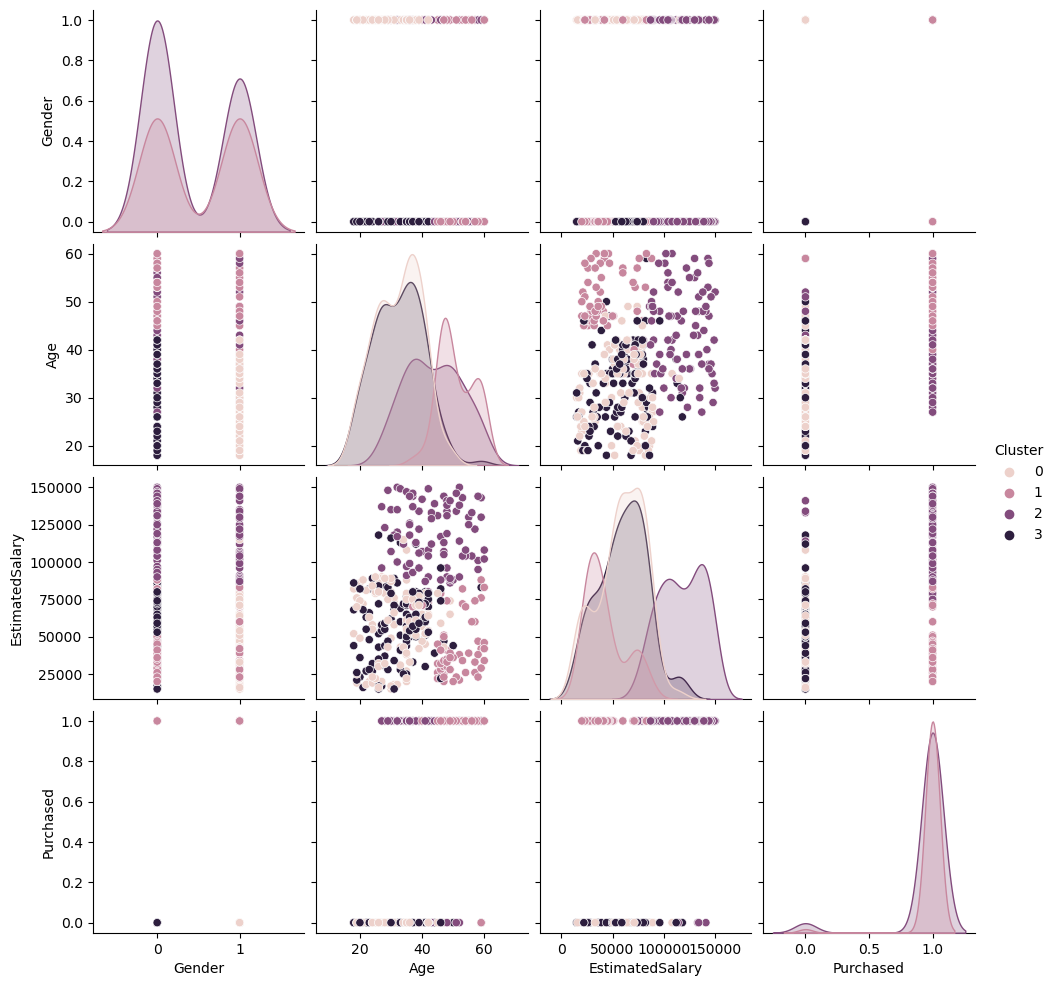

In [17]:
# Visualization
sns.pairplot(df, hue='Cluster', vars=['Gender', 'Age', 'EstimatedSalary', 'Purchased'])
plt.show()

In [19]:
# Strategic Marketing Recommendations
# Example: Based on the analysis of cluster profiles
for i, profile in cluster_profiles.iterrows():
    print(f"Cluster {i}:")
    print(f"Gender: {'Male' if profile['Gender'] > 0.5 else 'Female'}, Age: {profile['Age']:.2f}, "
          f"Estimated Salary: ${profile['EstimatedSalary']:.2f}, Purchased: {'Yes' if profile['Purchased'] > 0.5 else 'No'}")
    print("Recommendation: ...")
    print("\n")

# Save the clustered data to a new CSV file
df.to_csv('clustered_customer_data.csv', index=False)

Cluster 0:
Gender: Male, Age: 32.36, Estimated Salary: $59000.00, Purchased: No
Recommendation: ...


Cluster 1:
Gender: Female, Age: 50.88, Estimated Salary: $42600.00, Purchased: Yes
Recommendation: ...


Cluster 2:
Gender: Female, Age: 43.57, Estimated Salary: $117556.82, Purchased: Yes
Recommendation: ...


Cluster 3:
Gender: Female, Age: 32.52, Estimated Salary: $60040.65, Purchased: No
Recommendation: ...




Recommendation: This segment consists of younger females with moderate salaries who did not make a purchase. Consider engaging them with targeted promotions or discounts on items they have shown interest in. Emphasize value and utility to overcome potential barriers to purchase.

These recommendations are based on typical consumer behavior patterns inferred from the clusters' characteristics. Adjustments can be made based on additional insights into specific preferences and behaviors within each cluster to optimize marketing strategies effectively.







*